In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
from math import sqrt
from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import KMeans


from env import get_connection
import wrangle_zillow
import prepare
import env
import acquire
import wrangle_mall


# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
train, val, test = prepare.train_val_test(df)

In [4]:
train.shape, val.shape, test.shape

((105, 5), (27, 5), (18, 5))

In [5]:
X_train = train[['petal_width', 'sepal_width']]

In [8]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X_train)

kmeans.predict(X_train)

array([2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0,
       1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1], dtype=int32)

In [9]:
train['cluster'] = kmeans.predict(X_train)

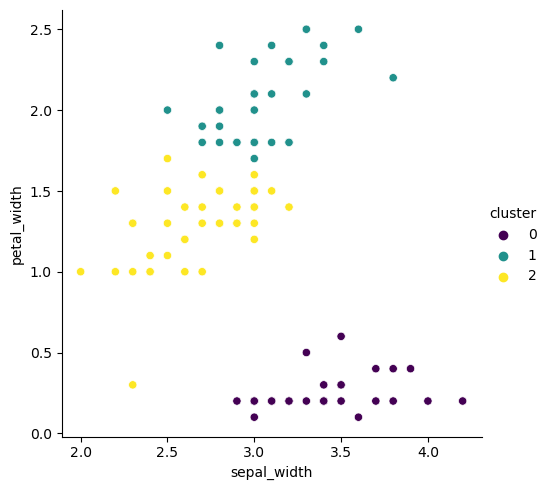

In [16]:
sns.relplot(x='sepal_width', y='petal_width', hue='cluster', palette='viridis', data=train)
plt.show()

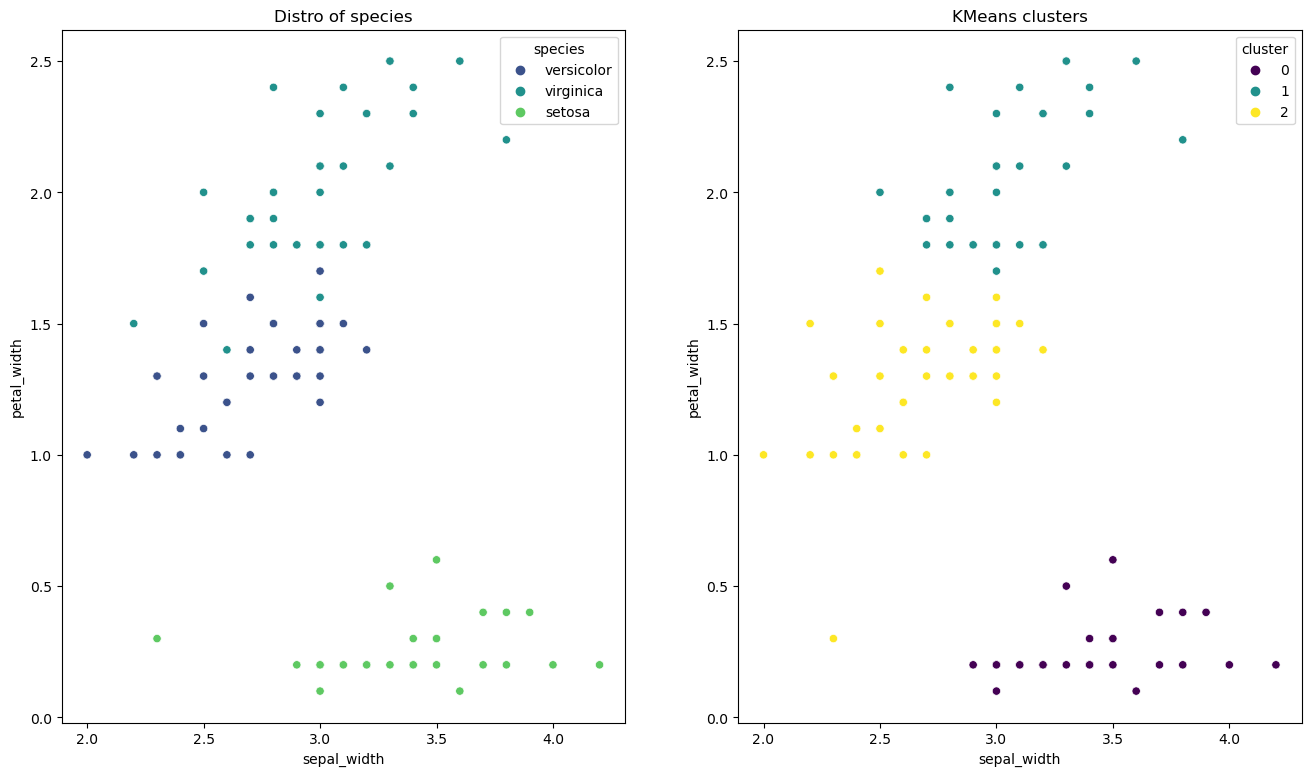

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax = axes[0], x = 'sepal_width', y = 'petal_width', 
                hue = 'species', palette = 'viridis', data = train)
axes[0].set_title('Distro of species')

sns.scatterplot(ax = axes[1], x = 'sepal_width', y = 'petal_width', 
                hue = 'cluster', palette = 'viridis', data = train)
axes[1].set_title('KMeans clusters')
plt.show()

In [23]:
inertia_list = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    inertia_list.append(kmeans.inertia_)
    
inertia_list 

[26.498234524847426,
 13.825660449545673,
 10.040170168067228,
 7.912293706293706,
 5.9421694115063675,
 5.071916000666001]

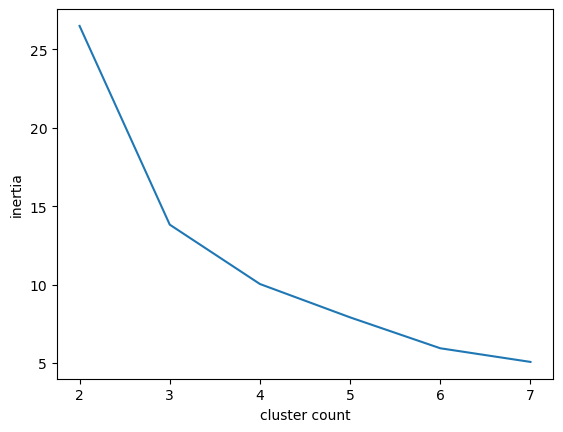

In [29]:
sns.lineplot(x = range(2, 8), y = inertia_list)
plt.ylabel('inertia')
plt.xlabel('cluster count')
plt.show()

In [30]:
a_train = train[['sepal_length', 'petal_length', 'sepal_width']]

In [31]:
kmeans2 = KMeans(n_clusters=3)

kmeans2.fit(a_train)

kmeans2.predict(a_train)

array([0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1,
       0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0,
       0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2], dtype=int32)

In [32]:
train['cluster_3f'] = kmeans2.predict(a_train)

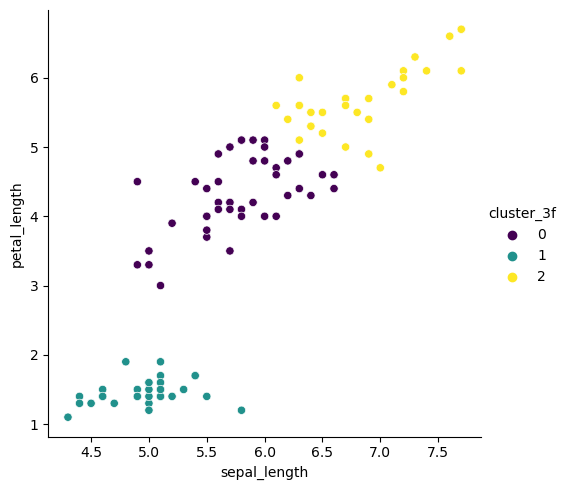

In [35]:
sns.relplot(x = 'sepal_length', y = 'petal_length', hue = 'cluster_3f', palette = 'viridis', data = train)
plt.show()

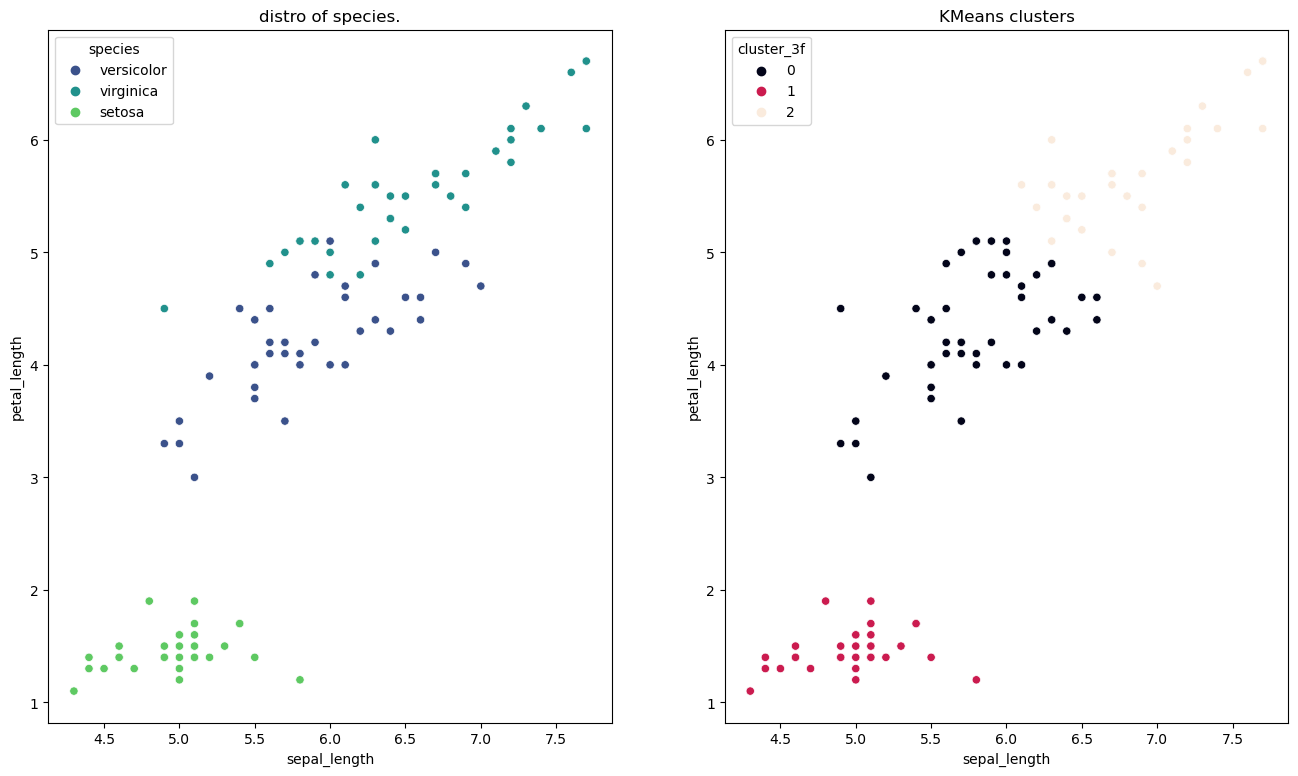

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax = axes[0], x = 'sepal_length', y = 'petal_length', 
                hue = 'species', palette = 'viridis', data = train)
axes[0].set_title('distro of species.')

sns.scatterplot(ax = axes[1], x = 'sepal_length', y = 'petal_length', 
                hue = 'cluster_3f', palette = 'rocket', data = train)
axes[1].set_title('KMeans clusters')
plt.show()

In [40]:
inertia_list_3f = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(a_train)
    inertia_list_3f.append(kmeans.inertia_)
    
inertia_list_3f 

[100.9303314001657,
 48.533219941348975,
 33.5565858058766,
 27.493514719797066,
 23.145501456209693,
 19.50118045112782]

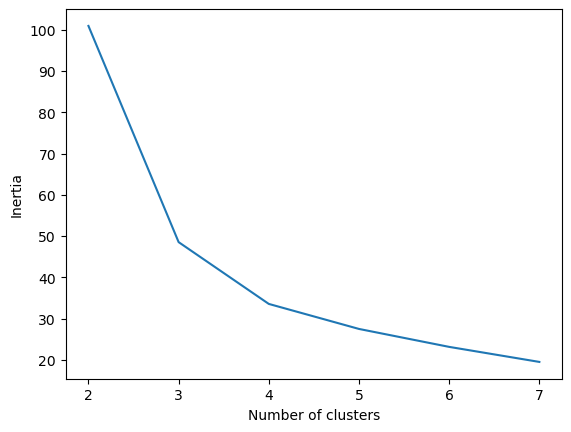

In [41]:
sns.lineplot(x = range(2, 8), y = inertia_list_3f)
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.show()

In [42]:
mall_df = wrangle_mall.get_mall()

In [43]:
mall_df.head()

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [44]:
mall_df.drop(columns = 'Unnamed: 0', inplace = True)

In [45]:
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
train, val, test = prepare.train_val_test(mall_df)

In [47]:
train.shape, val.shape, test.shape

((140, 5), (36, 5), (24, 5))

In [48]:
X_train_mall = train[['age', 'annual_income']]

In [49]:
mall_kmeans = KMeans(n_clusters=5)

mall_kmeans.fit(X_train_mall)

mall_kmeans.predict(X_train_mall)

array([0, 0, 1, 3, 1, 4, 3, 2, 4, 4, 1, 0, 0, 1, 4, 0, 1, 0, 0, 0, 1, 4,
       3, 2, 2, 4, 0, 1, 2, 1, 1, 0, 4, 1, 1, 2, 0, 1, 1, 0, 1, 3, 0, 0,
       4, 0, 3, 3, 0, 4, 0, 1, 2, 0, 3, 0, 3, 3, 0, 1, 3, 4, 0, 0, 1, 1,
       2, 0, 4, 1, 0, 1, 0, 4, 1, 0, 1, 0, 3, 0, 2, 2, 2, 1, 4, 3, 1, 4,
       0, 4, 4, 2, 4, 3, 1, 3, 0, 0, 1, 3, 0, 0, 0, 2, 3, 3, 4, 3, 2, 1,
       1, 0, 1, 3, 4, 2, 0, 1, 0, 2, 1, 1, 0, 4, 0, 0, 0, 4, 0, 4, 0, 2,
       1, 2, 3, 4, 1, 4, 2, 4], dtype=int32)

In [50]:
train['cluster'] = mall_kmeans.predict(X_train_mall)

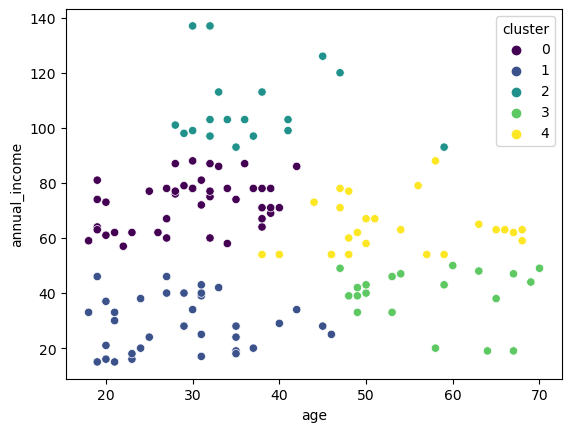

In [53]:
sns.scatterplot(x = 'age', y = 'annual_income', hue = 'cluster', palette = 'viridis', data = train)
plt.show()

In [54]:
mall_inertia = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train_mall)
    mall_inertia.append(kmeans.inertia_)
    
mall_inertia

[63032.83824733825,
 42291.91483516483,
 26730.53903508772,
 21900.59867433097,
 18373.721028971027,
 15554.159028226677]

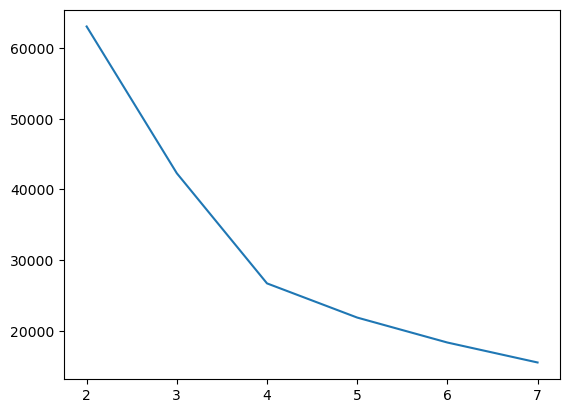

In [58]:
sns.lineplot(x = range(2, 8), y = mall_inertia)
plt.show()

In [63]:
mall_train, mall_val, mall_test = wrangle_mall.scale_splits_mm(train, val, test)

In [64]:
mall_train.head()

,customer_id,gender,age,annual_income,spending_score,cluster
169,170,Male,0.269231,0.590164,63,0
97,98,Female,0.173077,0.368852,50,0
31,32,Female,0.057692,0.122951,73,1
12,13,Female,0.769231,0.040984,15,3
35,36,Female,0.057692,0.147541,81,1


In [65]:
X_scale = mall_train[['age', 'annual_income']]

In [66]:
kmeans_scale = KMeans(n_clusters=5)

kmeans_scale.fit(X_scale)

kmeans_scale.predict(X_scale)

array([1, 1, 4, 0, 4, 0, 0, 3, 2, 0, 4, 1, 1, 4, 0, 1, 0, 1, 1, 1, 4, 0,
       0, 3, 3, 0, 1, 0, 3, 4, 0, 1, 0, 4, 4, 3, 1, 4, 4, 1, 4, 0, 1, 1,
       2, 1, 2, 2, 1, 0, 3, 4, 3, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 4, 4,
       3, 1, 0, 4, 3, 4, 1, 0, 4, 1, 4, 1, 2, 1, 3, 2, 3, 4, 2, 0, 4, 2,
       1, 0, 2, 3, 0, 2, 4, 0, 1, 1, 4, 2, 1, 1, 1, 3, 0, 0, 0, 0, 3, 4,
       4, 1, 4, 2, 2, 3, 1, 4, 1, 3, 4, 4, 1, 0, 1, 1, 1, 2, 1, 2, 1, 3,
       4, 3, 0, 2, 4, 0, 3, 2], dtype=int32)

In [67]:
mall_train['cluster'] = kmeans_scale.predict(X_scale)

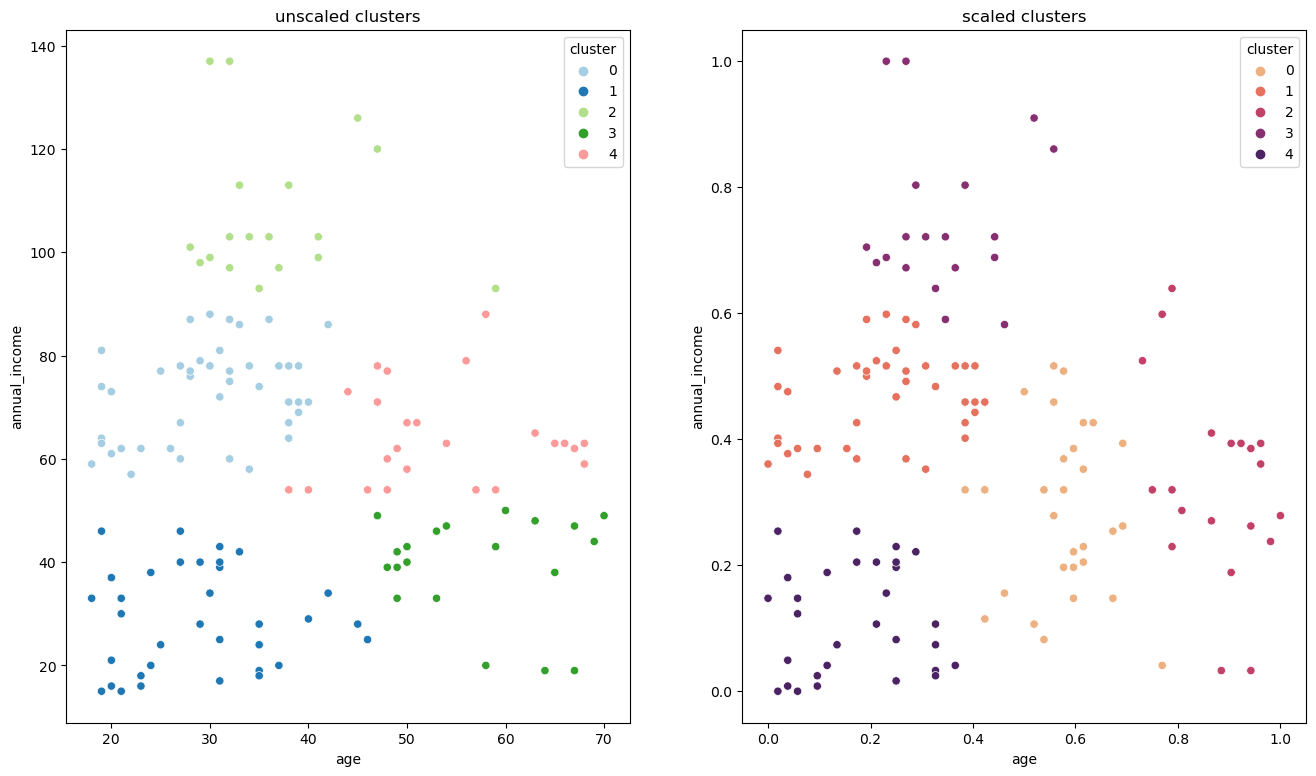

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax = axes[0], x = 'age', y = 'annual_income', 
                hue = 'cluster', palette = 'Paired', data = train)
axes[0].set_title('unscaled clusters')

sns.scatterplot(ax = axes[1], x = 'age', y = 'annual_income', 
                hue = 'cluster', palette = 'flare', data = mall_train)
axes[1].set_title('scaled clusters')
plt.show()